In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
raw_data_copy = pd.read_csv(r'pollution_us_2000_2016.csv')
raw_data_copy['State County Site Code'] = raw_data_copy['State Code'].astype(str) + '-' + raw_data_copy['County Code'].astype(str) + '-' + raw_data_copy['Site Num'].astype(str)
raw_data_copy['SO2 AQI'] = raw_data_copy['SO2 AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['SO2 AQI'].transform('mean'))
raw_data_copy['CO AQI'] = raw_data_copy['CO AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['CO AQI'].transform('mean'))
raw_data_copy = raw_data_copy.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num'], axis = 1)
new_data = raw_data_copy.groupby(['Address', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI',]].transform('mean')
new_data['Address'] = raw_data_copy['Address']
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
raw_data_copy = new_data
data_with_site = raw_data_copy.drop_duplicates()
new_data = data_with_site.groupby(['City', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']

data_with_city = new_data
data_with_city = data_with_city.drop_duplicates()
cols_to_include = ['city', 'county_name', 'state_name', 'lat', 'lng', "county_fips", "state_id"]
coordinates = pd.read_csv('uscities.csv')[cols_to_include]
combined = pd.merge(data_with_city, coordinates, how = 'left', 
                   left_on = ['County', 'State'], right_on = ['county_name', 'state_name']).drop(['city', 'county_name', 'state_name'], axis = 1)



In [15]:
map_data = combined[np.isfinite(combined['county_fips'])]
map_data = map_data[map_data["State"] == "California"]

data_2005 = map_data[map_data["Date Local"].str.contains("2005")]
fips_2005 = data_2005["county_fips"].unique()
fips_2005 = fips_2005.astype(np.int)

co_aqi_2005 = data_2005.groupby("county_fips").mean()["CO AQI"]
leg_range = list(range(1, 10))
aqi_2005_fig = ff.create_choropleth(fips=fips_2005, values=co_aqi_2005, binning_endpoints=leg_range, 
                           legend_title='CO AQI', title='Mean CO AQI for County in 2005', 
                           scope=['CA'])
aqi_2005_fig.layout.template = None

data_2015 = map_data[map_data["Date Local"].str.contains("2015")]
fips_2015 = data_2015["county_fips"].unique()
fips_2015 = fips_2015.astype(np.int)

co_aqi_2015 = data_2015.groupby("county_fips").mean()["CO AQI"]
aqi_2015_fig = ff.create_choropleth(fips=fips_2015, values=co_aqi_2015, binning_endpoints=leg_range, 
                           legend_title='CO AQI', title='Mean CO AQI for County in 2015', 
                           scope=['CA'])
aqi_2015_fig.layout.template = None

In [20]:
co_us_fig = go.Figure(data=go.Choropleth(
    locations=list(combined.groupby('state_id').groups.keys()), # Spatial coordinates
    z = list(combined.groupby('state_id').mean()["CO AQI"]), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "CO AQI",
    marker_line_color = "white"
))

co_us_fig.update_layout(
    title_text = 'US Mean CO AQI by State',
    geo_scope='usa', # limite map scope to USA
)

so2_us_fig = go.Figure(data=go.Choropleth(
    locations=list(combined.groupby('state_id').groups.keys()), # Spatial coordinates
    z = list(combined.groupby('state_id').mean()["SO2 AQI"]), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "SO2 AQI",
    marker_line_color = "white"
))

so2_us_fig.update_layout(
    title_text = 'US Mean SO2 AQI by State',
    geo_scope='usa', # limite map scope to USA
)

no2_us_fig = go.Figure(data=go.Choropleth(
    locations=list(combined.groupby('state_id').groups.keys()), # Spatial coordinates
    z = list(combined.groupby('state_id').mean()["NO2 AQI"]), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "NO2 AQI",
    marker_line_color = "white"
))

no2_us_fig.update_layout(
    title_text = 'US Mean NO2 AQI by State',
    geo_scope='usa', # limite map scope to USA
)

o3_us_fig = go.Figure(data=go.Choropleth(
    locations=list(combined.groupby('state_id').groups.keys()), # Spatial coordinates
    z = list(combined.groupby('state_id').mean()["O3 AQI"]), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "O3 AQI",
    marker_line_color = "white"
))

o3_us_fig.update_layout(
    title_text = 'US Mean O3 AQI by State',
    geo_scope='usa', # limite map scope to USA
);

# US Pollution Analysis from 2000 - 2016
Charles Elliot, Cindy Huynh, Lily Moon, Shubham Kaushal

Fall 2019

# Introduction

### Why is it important to study pollution trends?
* Climate change
* Environmental issues
* Health issues

### Why focus on data visualization?
* Eaisest for general public to understand
* We want to educate about the severity of our carbon footprint on the enviroment

### We want to explore questions like:
* How population density contributes to pollution?
* How daily activities of society affects the environment more than we realize?

# Datasets

## The US Pollution 2000 - 2016 Dataset
<div class="image-txt-container">
    
xlfansldkfnalsdnfla    
    
    
<img src="dataset_info.png" width="70%">

</div>

## Other dataset

describe and explain the dataset and cleaning process for each data set

# Exploratory Data Analysis and Visualization

## Our data vis 

explain what this vis is telling us, how we produced it, and analysis

In [26]:
display(co_us_fig)
display(no2_us_fig)
display(so2_us_fig)
display(o3_us_fig)

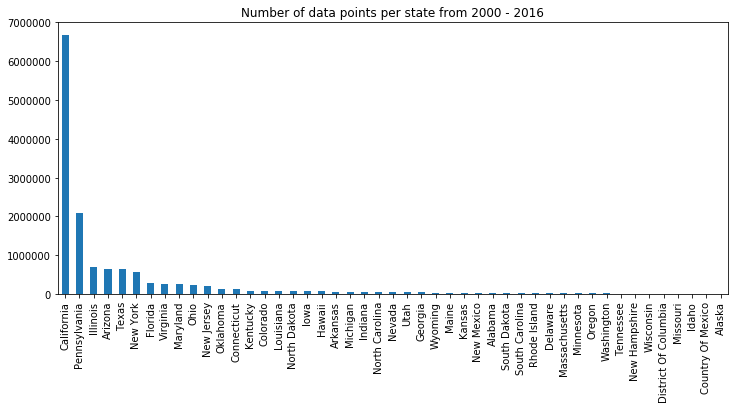

In [24]:
combined.State.value_counts().plot(kind='bar', figsize=(12,5)).title.set_text('Number of data points per state from 2000 - 2016')

## Assessment of Air Quality in 2005 vs. 2015

explain what this vis is telling us, how we produced it, and analysis

## Air Quality in 2005

In [16]:
aqi_2005_fig.show()

## Air Quality in 2015

In [20]:
aqi_2015_fig.show()

# Conclusion

## Future Plans

talk about or future plans

# Acknowledegments

We would like to thank Ahan Mukhopdhyay for his continuous support and guidance throughout this project.

# References

https://plot.ly/python/choropleth-maps/
https://plot.ly/python/county-choropleth/